In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

C:\Users\agamm\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('NYCTaxiFares.csv')

In [3]:
df

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1
...,...,...,...,...,...,...,...,...
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1
119997,2010-04-18 18:50:40 UTC,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3
119998,2010-04-13 08:14:44 UTC,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1


In [5]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [6]:
# Haversine formula: determining distance between 2 points given their latitude and longtitude

In [14]:
from numpy import radians, cos, sin, arcsin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """

    #Convert decimal degrees to Radians:
    lon1 = np.radians(lon1.values)
    lat1 = np.radians(lat1.values)
    lon2 = np.radians(lon2.values)
    lat2 = np.radians(lat2.values)

    #Implementing Haversine Formula: 
    dlon = np.subtract(lon2, lon1)
    dlat = np.subtract(lat2, lat1)

    a = np.add(np.power(np.sin(np.divide(dlat, 2)), 2),  
                          np.multiply(np.cos(lat1), 
                                      np.multiply(np.cos(lat2), 
                                                  np.power(np.sin(np.divide(dlon, 2)), 2))))
    c = np.multiply(2, np.arcsin(np.sqrt(a)))
    r = 6371

    return c*r
def distance(s_lat, s_lng, e_lat, e_lng):

   # approximate radius of earth in km
   R = 6373.0

   s_lat = s_lat*np.pi/180.0                      
   s_lng = np.deg2rad(s_lng)     
   e_lat = np.deg2rad(e_lat)                       
   e_lng = np.deg2rad(e_lng)  

   d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2

   return 2 * R * np.arcsin(np.sqrt(d))

from haversine import haversine


In [17]:
df['dist_kmm'] = haversine(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])
df['dist_km'] = distance(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

In [18]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,dist_kmm
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126979,1.925522
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392744,1.765370
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.327808,3.818373
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864714,2.158661
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.233591,9.457764


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
 9   dist_kmm           120000 non-null  float64            
 10  EDTdate            120000 non-null  datetime64[ns, UTC]
 11  Hour               120000 non-null  category           
 12  AMPM               120000 non-

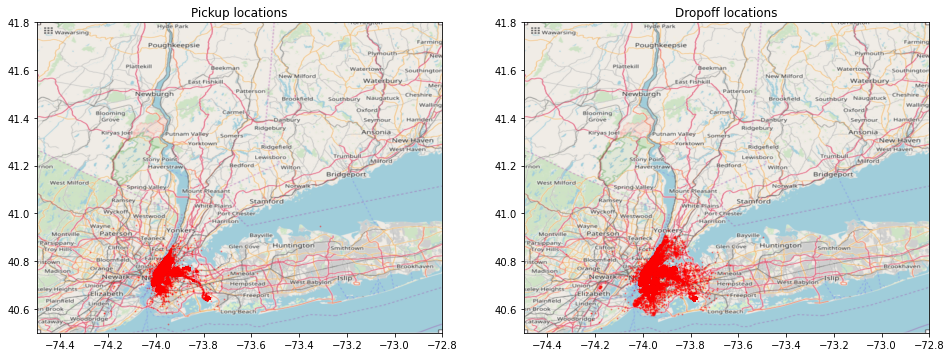

In [174]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')
plot_on_map(df, BB, nyc_map, s=1, alpha=0.3)

In [20]:
# convert datetime string to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
 9   dist_kmm           120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7), int64(2)
memory usage: 9.2 MB


In [24]:
one_time = df['pickup_datetime'][0]

In [25]:
one_time.hour

8

In [26]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [27]:
df['Hour'] = df['EDTdate'].dt.hour

In [28]:
df['AMPM'] = np.where(df['Hour']<12, 'am', 'pm')

In [29]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,dist_kmm,EDTdate,Hour,AMPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126979,1.925522,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392744,1.765370,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.327808,3.818373,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864714,2.158661,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.233591,9.457764,2010-04-16 22:19:01+00:00,22,pm


In [33]:
df['Weekday'] = df['EDTdate'].dt.strftime("%a")
df['DoW'] = df['EDTdate'].dt.dayofweek

In [37]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,dist_kmm,EDTdate,Hour,AMPM,Weekday,DoW
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126979,1.925522,2010-04-19 04:17:56+00:00,4,am,Mon,0
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392744,1.765370,2010-04-17 11:43:53+00:00,11,am,Sat,5
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.327808,3.818373,2010-04-17 07:23:26+00:00,7,am,Sat,5
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864714,2.158661,2010-04-11 17:25:03+00:00,17,pm,Sun,6
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.233591,9.457764,2010-04-16 22:19:01+00:00,22,pm,Fri,4


In [38]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'dist_kmm', 'EDTdate', 'Hour', 'AMPM',
       'Weekday', 'DoW'],
      dtype='object')

In [45]:
cat_cols = ['Hour', 'AMPM', 'Weekday', 'DoW']
cont_cols = ['pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'dist_km']

In [46]:
y_col = ['fare_amount']

In [41]:
# Categorical to numeric

In [47]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
dist_kmm                         float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMPM                            category
Weekday                         category
DoW                                int64
dtype: object

In [48]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [50]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
dist_kmm                         float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMPM                            category
Weekday                         category
DoW                             category
dtype: object

In [51]:
df['Weekday']

0         Mon
1         Sat
2         Sat
3         Sun
4         Fri
         ... 
119995    Sun
119996    Fri
119997    Sun
119998    Tue
119999    Sat
Name: Weekday, Length: 120000, dtype: category
Categories (7, object): [Fri, Mon, Sat, Sun, Thu, Tue, Wed]

In [54]:
df['AMPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [60]:
df['AMPM'].cat.codes.values

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

In [61]:
hr = df['Hour'].cat.codes.values
ampm = df['AMPM'].cat.codes.values
wd = df['Weekday'].cat.codes.values
dw = df['DoW'].cat.codes.values

In [62]:
dw

array([0, 5, 5, ..., 6, 1, 5], dtype=int8)

In [67]:
cats = np.stack([hr, ampm, wd, dw], axis=1)

In [68]:
cats

array([[ 4,  0,  1,  0],
       [11,  0,  2,  5],
       [ 7,  0,  2,  5],
       ...,
       [14,  1,  3,  6],
       [ 4,  0,  5,  1],
       [12,  1,  2,  5]], dtype=int8)

In [69]:
# category numpy to sensor
cats = torch.tensor(cats, dtype=torch.int64)

In [70]:
# continous to tensor
conts = np.stack([df[col].values for col in cont_cols], axis=1)
conts = torch.tensor(conts, dtype=torch.float)
conts

In [81]:
# label to tensor
y = torch.tensor(df[y_col].values, dtype=torch.float).reshape(-1, 1)

In [79]:
cats.shape

torch.Size([120000, 4])

In [80]:
conts.shape

torch.Size([120000, 6])

In [82]:
y.shape

torch.Size([120000, 1])

In [85]:
cats_size = [len(df[col].cat.categories) for col in cat_cols]

In [86]:
cats_size

[24, 2, 7, 7]

In [87]:
embedding_size = [(size, min(50, (size+1)//2)) for size in cats_size]

In [88]:
embedding_size

[(24, 12), (2, 1), (7, 4), (7, 4)]

In [90]:
# Tabular model - using embedding layer

In [97]:
catz = cats[:2]

In [98]:
catz

tensor([[ 4,  0,  1,  0],
        [11,  0,  2,  5]])

In [95]:
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])

In [96]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
  (3): Embedding(7, 4)
)

In [99]:
# forward
embedding_z = []

for i, e in enumerate(selfembeds):
    embedding_z.append(e(catz[:,i]))

In [100]:
embedding_z

[tensor([[-0.5119, -0.3120, -0.2070,  1.0147, -0.1899, -1.8495, -1.3413, -0.0861,
           0.2699, -0.7946, -0.0525,  0.0954],
         [-1.5514, -0.2096, -3.3229, -1.0471,  0.1643, -1.2379, -1.0367,  0.6582,
           1.6544,  1.0761, -1.1668,  0.3103]], grad_fn=<EmbeddingBackward>),
 tensor([[-1.4761],
         [-1.4761]], grad_fn=<EmbeddingBackward>),
 tensor([[ 0.6852, -1.4200, -1.1298,  0.4421],
         [-0.8668,  0.0154, -0.1365,  0.3967]], grad_fn=<EmbeddingBackward>),
 tensor([[-1.3833,  0.6343, -2.5585,  1.0605],
         [ 1.0538, -0.0709,  1.2029, -0.5638]], grad_fn=<EmbeddingBackward>)]

In [105]:
z = torch.cat(embedding_z, 1)

In [106]:
z

tensor([[-0.5119, -0.3120, -0.2070,  1.0147, -0.1899, -1.8495, -1.3413, -0.0861,
          0.2699, -0.7946, -0.0525,  0.0954, -1.4761,  0.6852, -1.4200, -1.1298,
          0.4421, -1.3833,  0.6343, -2.5585,  1.0605],
        [-1.5514, -0.2096, -3.3229, -1.0471,  0.1643, -1.2379, -1.0367,  0.6582,
          1.6544,  1.0761, -1.1668,  0.3103, -1.4761, -0.8668,  0.0154, -0.1365,
          0.3967,  1.0538, -0.0709,  1.2029, -0.5638]], grad_fn=<CatBackward>)

In [107]:
selfembeddingdrop = nn.Dropout(0.4)

In [108]:
z = selfembeddingdrop(z)

In [109]:
z

tensor([[-0.0000, -0.5201, -0.0000,  0.0000, -0.0000, -3.0826, -2.2355, -0.1435,
          0.4498, -1.3244, -0.0000,  0.0000, -2.4601,  1.1420, -2.3667, -0.0000,
          0.7369, -2.3055,  1.0572, -4.2642,  1.7675],
        [-2.5857, -0.3494, -5.5382, -0.0000,  0.2738, -0.0000, -1.7279,  0.0000,
          0.0000,  0.0000, -1.9447,  0.5172, -2.4601, -0.0000,  0.0256, -0.0000,
          0.6611,  1.7563, -0.0000,  2.0048, -0.9397]], grad_fn=<MulBackward0>)

In [113]:
class TabularModel(nn.Module):
#     u can define the number of layers in this manner of build - flexibility
    def __init__(self, emb_size, n_cont, out_size, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layer_list = []
        n_emb = sum([nf for ni, nf in emb_size])
        n_in = n_emb + n_cont
        
        for i  in layers:
            layer_list.append(nn.Linear(n_in, i))
            layer_list.append(nn.ReLU(inplace=True))
            layer_list.append(nn.BatchNorm1d(i))
            layer_list.append(nn.Dropout(p))
            n_in = i
            
        layer_list.append(nn.Linear(layers[-1], out_size))
        self.layers = nn.Sequential(*layer_list)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [114]:
torch.manual_seed(33)
model = TabularModel(embedding_size, conts.shape[1], 1, [200, 100], p=0.4)
# for classification problem, use class size 2 instead of 1

In [115]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
    (3): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=27, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [145]:
criterion = nn.MSELoss()
# for classification problem: use nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [146]:
# train_test_split
batch_size = 60000
test_size = int(batch_size*0.2)

In [147]:
# shuffled 
cat_train = cats[:batch_size-test_size] 
cat_test = cats[batch_size - test_size:batch_size]

con_train = conts[:batch_size-test_size]
con_test = conts[batch_size - test_size:batch_size]

In [148]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size - test_size:batch_size]

In [149]:
len(cat_train)

48000

In [130]:
len(con_train)

48000

In [131]:
len(y_train)

48000

In [132]:
len(cat_test)

12000

In [139]:
import time
start_time = time.time()

epochs = 200

losses = []

for i in range(epochs):
    i+=1
    
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train))
    losses.append(loss)
    if i%25 == 1:
        print(f"epoch:{i} loss: {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
duration = time.time() - start_time
print(f"training time: {duration/60}min")

epoch:1 loss: 5.129139423370361
epoch:26 loss: 4.209855556488037
epoch:51 loss: 3.8470101356506348
epoch:76 loss: 3.72000789642334
epoch:101 loss: 3.6924450397491455
epoch:126 loss: 3.6232144832611084
epoch:151 loss: 3.5689051151275635
epoch:176 loss: 3.5441813468933105
training time: 13.40824362039566min


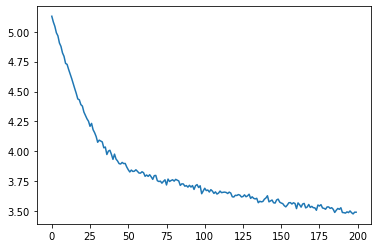

In [150]:
plt.plot(losses)

In [151]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val,y_test))

In [152]:
loss

tensor(3.4592)

In [153]:
for i in range(10):
    diff = np.abs(y_val[i].item()-y_test[i].item())
    print(f"{i}predicted {y_val[i].item():8.2f} True:{y_test[i].item():8.2f} DIFF: {diff:8.2f}")

0predicted     2.07 True:    2.90 DIFF:     0.83
1predicted    19.45 True:    5.70 DIFF:    13.75
2predicted     5.50 True:    7.70 DIFF:     2.20
3predicted    10.44 True:   12.50 DIFF:     2.06
4predicted     4.83 True:    4.10 DIFF:     0.73
5predicted     6.08 True:    5.30 DIFF:     0.78
6predicted     1.54 True:    3.70 DIFF:     2.16
7predicted    20.93 True:   14.50 DIFF:     6.43
8predicted     5.04 True:    5.70 DIFF:     0.66
9predicted    12.88 True:   10.10 DIFF:     2.78


In [154]:
torch.save(model.state_dict(), 'taxi_model_kaggle_pytorch.pt')

In [155]:
# Loading saved model 
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

def haversine_distance(df, lat1, long1, lat2, long2):
    r = 6371
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return r * c

class TabularModel(nn.Module):
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers = nn.Sequential(*layerlist)
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        return self.layers(x)

In [156]:
emb_szs = [(24, 12), (2, 1), (7, 4)]
model2 = TabularModel(emb_szs, 6, 1, [200,100], p=0.4)

In [162]:
def test_data(mdl): # pass in the name of the new model
    # INPUT NEW DATA
    plat = float(input('What is the pickup latitude?  '))
    plong = float(input('What is the pickup longitude? '))
    dlat = float(input('What is the dropoff latitude?  '))
    dlong = float(input('What is the dropoff longitude? '))
    psngr = int(input('How many passengers? '))
    dt = input('What is the pickup date and time?\nFormat as YYYY-MM-DD HH:MM:SS     ')
    
    # PREPROCESS THE DATA
    dfx_dict = {'pickup_latitude':plat,'pickup_longitude':plong,'dropoff_latitude':dlat,
         'dropoff_longitude':dlong,'passenger_count':psngr,'EDTdate':dt}
    dfx = pd.DataFrame(dfx_dict, index=[0])
    dfx['dist_km'] = haversine_distance(dfx,'pickup_latitude', 'pickup_longitude',
                                        'dropoff_latitude', 'dropoff_longitude')
    dfx['EDTdate'] = pd.to_datetime(dfx['EDTdate'])
    
    # We can skip the .astype(category) step since our fields are small,
    # and encode them right away
    dfx['Hour'] = dfx['EDTdate'].dt.hour
    dfx['AMorPM'] = np.where(dfx['Hour']<12,0,1) 
    dfx['Weekday'] = dfx['EDTdate'].dt.strftime("%a")
    dfx['Weekday'] = dfx['Weekday'].replace(['Fri','Mon','Sat','Sun','Thu','Tue','Wed'],
                                            [0,1,2,3,4,5,6]).astype('int64')
    # CREATE CAT AND CONT TENSORS
    cat_cols = ['Hour', 'AMorPM', 'Weekday']
    cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
                 'dropoff_longitude', 'passenger_count', 'dist_km']
    xcats = np.stack([dfx[col].values for col in cat_cols], 1)
    xcats = torch.tensor(xcats, dtype=torch.int64)
    xconts = np.stack([dfx[col].values for col in cont_cols], 1)
    xconts = torch.tensor(xconts, dtype=torch.float)
    
    # PASS NEW DATA THROUGH THE MODEL WITHOUT PERFORMING A BACKPROP
    with torch.no_grad():
        z = mdl(xcats, xconts)
    print(f'\nThe predicted fare amount is ${z.item():.2f}')

In [ ]:
z = test_data(model)

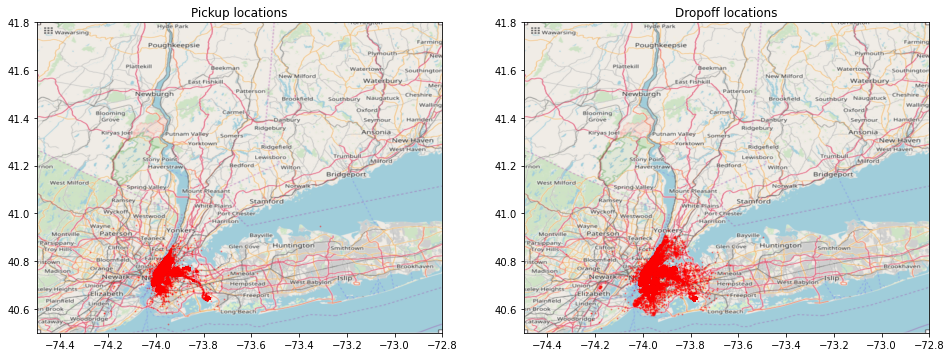